In [220]:
import numpy       as np
import pandas      as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data and extract the relevant columns.
Relevant Columns will be Finances, Gender, Village-Town and Healthy Eating.

In [221]:
fsev_all = pd.read_csv('responses.csv')
fsev_df = pd.DataFrame(fsev_all)
df_new = fsev_df[["Finances","Gender","Village - town","Healthy eating"]]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Finances          1007 non-null float64
Gender            1004 non-null object
Village - town    1006 non-null object
Healthy eating    1007 non-null float64
dtypes: float64(2), object(2)
memory usage: 23.7+ KB


# Explore the data and understand how the data is distributed? Is there any outlier or missing value? And Share your insights.

In [222]:
df_new.describe()


,Finances,Healthy eating
count,1007.000000,1007.000000
mean,3.023833,3.031778
std,1.144365,0.936865
min,1.000000,1.000000
25%,2.000000,3.000000
50%,3.000000,3.000000
75%,4.000000,4.000000
max,5.000000,5.000000


In [223]:
df_new.groupby(["Gender"]).count()

,Finances,Village - town,Healthy eating
Gender,,,
female,591,591,592
male,410,409,409


In [224]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Finances          1007 non-null float64
Gender            1004 non-null object
Village - town    1006 non-null object
Healthy eating    1007 non-null float64
dtypes: float64(2), object(2)
memory usage: 23.7+ KB


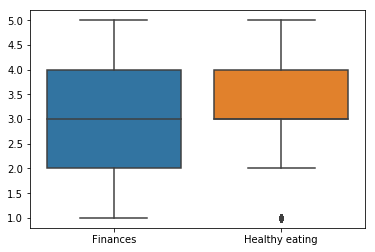

In [225]:
import matplotlib.pyplot as plt

sns.boxplot(data=df_new)

In [226]:
df_new.isnull().sum()

Finances          3
Gender            6
Village - town    4
Healthy eating    3
dtype: int64

# Out of 1010 entries:
 #Finance column have 3 missing data
 #Gender column have 6 missing data
 #Village - town have 4 missing data
 #Healthy eating have 3 missing data

# Treating Missing Data

In [227]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mode of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mode() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)



X = pd.DataFrame(df_new)
xt_df = DataFrameImputer().fit_transform(X)


for column in xt_df.columns:
    xt_df[column].fillna(xt_df[column].mode()[0], inplace=True)



In [228]:
xt_df.isnull().sum()

Finances          0
Gender            0
Village - town    0
Healthy eating    0
dtype: int64

# Treating Outliers

# Identifying the outliers

In [203]:
Q1 = xt_df.quantile(0.25)
Q3 = xt_df.quantile(0.75)
IQR = Q3 - Q1
((xt_df < (Q1 - 1.5 * IQR)) | (xt_df > (Q3 + 1.5 * IQR))).sum()



Finances           0
Gender             0
Healthy eating    81
Village - town     0
dtype: int64

# Replacing the outliers near lower Quantile to Q3 value and upper Quantile to Q1 value

In [218]:
for col in df_in[['Finances','Healthy eating']]:
    percentiles = xt_df[col].quantile([0.25,0.75]).values
    print(percentiles)
    Q1 = percentiles[0]
    Q3 = percentiles[1]
    IQR = Q3 - Q1
    xt_df[col][xt_df[col] < (Q1-1.5 * IQR)] = Q1
    xt_df[col][xt_df[col] > (Q1+1.5 * IQR)] = Q3
    #xt_df[col][xt_df[col] < percentiles[0]] = percentiles[0]
    #xt_df[col][xt_df[col] > percentiles[1]] = percentiles[1]
    
print(xt_df.info())

[2. 4.]
[3. 4.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Finances          1010 non-null float64
Gender            1010 non-null object
Village - town    1010 non-null object
Healthy eating    1010 non-null float64
dtypes: float64(2), object(2)
memory usage: 23.7+ KB
None


C:\Users\radha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\radha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


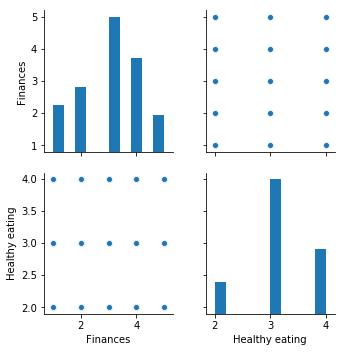

In [205]:
sns.pairplot(xt_df)

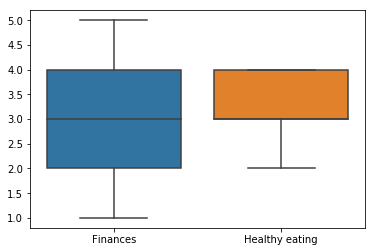

In [206]:
sns.boxplot(data=xt_df)

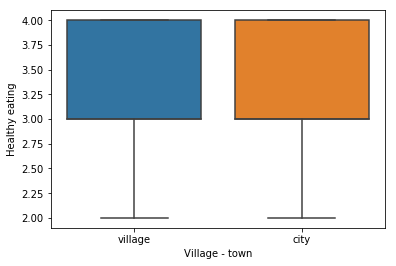

In [207]:
sns.boxplot(x="Village - town",y="Healthy eating",data=xt_df)

# Create Hypothesis on the following questions –

# Is saving money (finances) gender dependant?

In [208]:
contingency_table=pd.crosstab(xt_df["Gender"],xt_df["Finances"])
print('contingency_table :-\n',contingency_table)
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)

alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

critical_value=chi2.ppf(q=1-alpha,df=ddof)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value < alpha:
    print("Since p value ",p_value, "is < 0.05, Test is Significant and hence we reject null hypothesis(H0) at 5% level of significance. ")
else:
    print("Since p value ",p_value, "is > 0.05, Test is not Significant. Hence we fail to reject null hypothesis")


contingency_table :-
 Finances  1.0  2.0  3.0  4.0  5.0
Gender                           
female     65   98  223  150   63
male       60   76  138  102   35
Observed Values :-
 [[ 65  98 223 150  63]
 [ 60  76 138 102  35]]
Expected Values :-
 [[ 74.13366337 103.19405941 214.0980198  149.45346535  58.12079208]
 [ 50.86633663  70.80594059 146.9019802  102.54653465  39.87920792]]
p-value: 0.06488794180787472
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 3.407824415621621
critical_value: 3.841458820694124
p-value: 0.06488794180787472
Retain H0,There is no relationship between 2 categorical variables
Since p value  0.06488794180787472 is > 0.05, Test is not Significant. Hence we fail to reject null hypothesis


# Is there any differences in money saving (finances) between people from city or village?

In [209]:
contingency_table=pd.crosstab(xt_df["Village - town"],xt_df["Finances"])
print('contingency_table :-\n',contingency_table)
print("\n")

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
print("\n")

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)
print("\n")

no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)

alpha = 0.05
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

critical_value=chi2.ppf(q=1-alpha,df=ddof)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print("\n")
print('Significance level: ',alpha)
print("\n")
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value < alpha:
    print("Since p value ",p_value, "is < 0.05, Test is Significant and hence we reject null hypothesis(H0) at 5% level of significance. ")
else:
    print("Since p value ",p_value, "is > 0.05, Test is not Significant. Hence we fail to reject null hypothesis")

contingency_table :-
 Finances        1.0  2.0  3.0  4.0  5.0
Village - town                         
city             88  133  265  168   57
village          37   41   96   84   41


Observed Values :-
 [[ 88 133 265 168  57]
 [ 37  41  96  84  41]]


Expected Values :-
 [[ 87.9950495  122.48910891 254.12970297 177.3980198   68.98811881]
 [ 37.0049505   51.51089109 106.87029703  74.6019802   29.01188119]]


p-value: 0.08090059502646552


Significance level:  0.05


Degree of Freedom:  1
chi-square statistic: 3.0467156014116705
critical_value: 3.841458820694124
p-value: 0.08090059502646552
Retain H0,There is no relationship between 2 categorical variables
Since p value  0.08090059502646552 is > 0.05, Test is not Significant. Hence we fail to reject null hypothesis


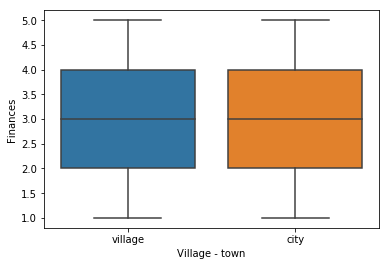

In [229]:
sns.boxplot(x="Village - town",y="Finances",data=xt_df)

# Do Women have a Healthier Lifestyle than Men?

Healty eating with gender value male vs Healthy eating with gender value Female

. Testing whether Healthy eating of female and male are same,the null hypothesis states that mean Healthy eating, 

  μM equals μF

. The alternative hypthesis states that the  Healthy eating is different for Male and Female.

Here we select :
α = 0.05 

In [242]:
healthy_e_female = xt_df[xt_df['Gender'] == 'female'] ['Healthy eating']
healthy_e_male = xt_df[xt_df['Gender'] == 'male'] ['Healthy eating']

female_mean = healthy_e_female.mean()
male_mean = healthy_e_male.mean()

print("Mean of Female Healthy eating : ",female_mean)
print("Mean of Male Healthy eating : ",male_mean)

Mean of Female Healthy eating :  3.1669449081803007
Mean of Male Healthy eating :  3.116788321167883


In [234]:
Q1 = healthy_e_female.quantile(0.25)
Q3 = healthy_e_female.quantile(0.75)
IQR = Q3 - Q1
((healthy_e_female < (Q1 - 1.5 * IQR)) | (healthy_e_female > (Q3 + 1.5 * IQR))).sum()

36

In [235]:
Q1 = healthy_e_male.quantile(0.25)
Q3 = healthy_e_male.quantile(0.75)
IQR = Q3 - Q1
((healthy_e_male < (Q1 - 1.5 * IQR)) | (healthy_e_male > (Q3 + 1.5 * IQR))).sum()

0

In [231]:
t_statistic, p_value  =  stats.ttest_ind(healthy_e_male,healthy_e_female)
print('P Value %1.3f' % p_value)

if p_value < 0.05:
    print("Since p value ",p_value, "is < 0.05, Test is Significant and hence we reject null hypothesis(H0) at 5% level of significance. ")
else:
    print("Since p value ",p_value, "is > 0.05, Test is not Significant. Hence we fail to reject null hypothesis")

P Value 0.047
Since p value  0.04685965412880698 is < 0.05, Test is Significant and hence we reject null hypothesis(H0) at 5% level of significance. 


# Are Village People Healthier than City People?

Healty eating of village people vs Healthy eating of city people

. Testing whether Healty eating of village and city people are same.
. The null hypothesis states that mean Healthy eating, 
   μV equals μC
. The alternative hypthesis states that the Healthy eating is different in village and city.
Here we select : α = 0.05

In [232]:
healthy_e_village = xt_df[xt_df['Village - town'] == 'village'] ['Healthy eating']
healthy_e_city = xt_df[xt_df['Village - town'] == 'city'] ['Healthy eating']

village_mean = healthy_e_village.mean()
city_mean = healthy_e_city.mean()

print("Mean of village Healthy eating : ",village_mean)
print("Mean of City Healthy eating : ",city_mean)

Mean of village Healthy eating :  2.983277591973244
Mean of City Healthy eating :  3.052039381153305


In [233]:
t_statistic, p_value  =  stats.ttest_ind(healthy_e_village,healthy_e_city)
print('P Value %1.3f' % p_value)

if p_value < 0.05:
    print("Since p value ",p_value, "is < 0.05, Test is Significant and hence we reject null hypothesis(H0) at 5% level of significance. ")
else:
    print("Since p value ",p_value, "is > 0.05, Test is not Significant. Hence we fail to reject null hypothesis")

P Value 0.286
Since p value  0.2864594559841501 is > 0.05, Test is not Significant. Hence we fail to reject null hypothesis
